# Либы

In [ ]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import keras
from keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Укажите путь к загруженному архиву
zip_path = '/content/drive/MyDrive/generated-or-not.zip'

# Укажите путь, куда вы хотите извлечь содержимое архива
extract_path = '/content/sample_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Проверка содержимого
print(os.listdir(extract_path))

['anscombe.json', 'README.md', 'sample_submission.csv', 'test.csv', 'images', 'train.csv', 'mnist_train_small.csv', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv']


# Работа с директориями

In [ ]:
img_path = '/content/sample_data/images'
df_test = pd.read_csv('/content/sample_data/test.csv')
df_train = pd.read_csv('/content/sample_data/train.csv')
print(os.listdir(img_path))
print(img_path)

['RVoqYx4fJQ.jpeg', 'Qn6h9PKkcK.jpeg', 'sgQvpUG9d7.jpeg', 'yzvnxkrzQr.jpg', 'qMYFA0362c.jpeg', '7nsMqXTbX4.jpg', 'iLfMMbTFhI.jpeg', 'eVopMIgNuG.jpg', 'Y52AxkIcaq.png', 'Lm8FVWo7zY.jpeg', 'GwBuLBZ4qz.jpg', 'D3QkSqB8EO.jpg', 'eq1rRpthvi.jpeg', 'zvPH6cadBG.jpg', 'wutCTeTrHB.jpg', 'p6codywAKt.jpeg', 'WLAsVwaNJs.png', 'vmKQgidDXs.jpeg', 'Wb2I0CXlAY.jpg', 'UjFlMCLHzc.png', 'iiaGwIyRet.png', 'qbUFeIpFz1.jpeg', '2uHjr9R2CS.jpg', '9gDL4WuhiP.png', '07aHL0dVg4.jpg', '7Y1gMf1Bqf.jpeg', 'QjSAjqK0JF.jpeg', 'nHZeXabOJ8.jpeg', 'veiMOrSUGs.jpeg', 'F8v6kfpw2w.jpg', 'fAgib6zS5n.jpg', 'mjLp4pk6QQ.jpg', 'irXtIZPnTX.jpeg', 'JnNuYVUXmR.jpeg', 'hTHqG8ly5d.png', '1OgCiZOms8.jpg', '9UdFUds6Fe.jpeg', 'UC6SOqGSWS.jpg', 'QCOhbM1OuD.jpeg', 'yt9GwWtzr8.png', 'KB3LdgxaKa.jpeg', '4369Dl8wfs.jpeg', 'WVIRQDeOxd.jpg', '11kFDwoijA.jpeg', '01a7MiLURN.jpg', 'tgbESJpo8D.jpeg', 'am0fhckwjz.jpeg', 'XM2hZQpQZK.jpg', 'i4bJsEjJqg.jpeg', 'Le0UOVOf41.jpg', 'CJJ5WO9GJi.png', 'p568n1LSDH.png', 'ixaZ1KSK65.png', 'r7VWCCeGDC.jpeg', 'Y

In [ ]:
df_train[df_train['id'] == 'leaKPe3MTQ.jpeg' ]

,id,target
148,leaKPe3MTQ.jpeg,1


In [ ]:
df_train.shape

(1012, 2)

In [ ]:
df_test.shape

(506, 1)

In [ ]:
df_train['target'].value_counts()

target
0    667
1    345
Name: count, dtype: int64

#### Выносим названия фото, без расширений, как для папки с фото, так и для csv файлов

In [ ]:
import os
image_labels = os.listdir(img_path)
for i in range(len(image_labels)):
    image_labels[i] = [image_labels[i].split('.')[0], image_labels[i].split('.')[1]]

In [ ]:
train_labels = df_train['id']
for i in range(len(train_labels)):
    train_labels[i] = train_labels[i].split('.')[0]
df_train['id'] = train_labels

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-10-003cd930c163>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_labels[i] = train_labels[i].split('.')[0]
<ipython-input-10-003cd930c163>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_labels[i] = train_labels[i].split('.')[0]
<ipython-input-10-003cd930c163>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_labels[i] = train_labels[i

In [ ]:
test_labels = df_test['id']
for i in range(len(test_labels)):
    test_labels[i] = test_labels[i].split('.')[0]
df_test['id'] = test_labels
df_test.head()

,id
0,Qt1fGUB0Vz
1,j4Rhioq7R3
2,rD0hgFHJUZ
3,aY5z1EJsJ6
4,qZ3IoxD2TE


In [ ]:
print(df_train.shape)
print(df_test.shape)

(1012, 2)
(506, 1)


#### Сопоставляем ссылки на изображения с таргетом(train)

In [ ]:
for i in range(df_train.shape[0]):
    for j in range(len(image_labels)):
        if df_train['id'][i] == image_labels[j][0]:
            df_train['id'][i] = image_labels[j][0] + '.' + image_labels[j][1]
df_train.head()

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-13-9a4c6ce3cdd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['id'][i] = image_labels[j][0] + '.' + image_labels[j][1]
<ipython-input-13-9a4c6ce3cdd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['id'][i] = image_labels[j][0] + '.' + image_labels[j][1]
<ipython-input-13-9a4c6ce3cdd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,id,target
0,gL5fWrgNPU.jpg,0
1,KKWXJDN8uM.png,1
2,Wb2I0CXlAY.jpg,0
3,G7PLhKpaf7.jpeg,1
4,DEUkeefz6Z.jpg,0


In [ ]:
df_train["target"].value_counts()

target
0    667
1    345
Name: count, dtype: int64

In [ ]:
df_train["target"] = df_train["target"].astype(str)

In [ ]:
df_test

,id
0,Qt1fGUB0Vz
1,j4Rhioq7R3
2,rD0hgFHJUZ
3,aY5z1EJsJ6
4,qZ3IoxD2TE
...,...
501,Qrme6EUmL1
502,4369Dl8wfs
503,BrNEvRNpPu
504,DuwXCNmeMx


In [ ]:
for i in range(df_test.shape[0]):
    for j in range(len(image_labels)):
        if df_test['id'][i] == image_labels[j][0]:
            df_test['id'][i] = image_labels[j][0] + '.' + image_labels[j][1]
df_train.head()

,id,target
0,gL5fWrgNPU.jpg,0
1,KKWXJDN8uM.png,1
2,Wb2I0CXlAY.jpg,0
3,G7PLhKpaf7.jpeg,1
4,DEUkeefz6Z.jpg,0


In [ ]:
for i in range(df_test.shape[0]):
    df_test['id'][i] = '/content/sample_data/images/' + df_test['id'][i]
df_train.head()

,id,target
0,gL5fWrgNPU.jpg,0
1,KKWXJDN8uM.png,1
2,Wb2I0CXlAY.jpg,0
3,G7PLhKpaf7.jpeg,1
4,DEUkeefz6Z.jpg,0


In [ ]:
df_test

,id
0,/content/sample_data/images/Qt1fGUB0Vz.jpeg
1,/content/sample_data/images/j4Rhioq7R3.jpeg
2,/content/sample_data/images/rD0hgFHJUZ.jpeg
3,/content/sample_data/images/aY5z1EJsJ6.jpeg
4,/content/sample_data/images/qZ3IoxD2TE.jpeg
...,...
501,/content/sample_data/images/Qrme6EUmL1.png
502,/content/sample_data/images/4369Dl8wfs.jpeg
503,/content/sample_data/images/BrNEvRNpPu.jpeg
504,/content/sample_data/images/DuwXCNmeMx.webp


#### Предварительная обработка через ImageDataGenerator

In [ ]:
datagen_train = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
)

train_generator = datagen_train.flow_from_dataframe(
    dataframe = df_train,
    directory = '/content/sample_data/images',
    x_col = 'id',
    y_col = 'target',
    target_size = (256, 256),
    subset = 'training',
    class_mode = 'binary'
)

validation_generator = datagen_train.flow_from_dataframe(
    dataframe = df_train,
    directory = 'content/sample_data/images',
    x_col = 'id',
    y_col = 'target',
    target_size = (256, 256),
    subset = 'validation',
    class_mode = 'binary'
)

datagen_test = ImageDataGenerator(
    rescale = 1./255
)

test_generator = datagen_test.flow_from_dataframe(
    dataframe = df_test,
    directory = 'content/sample_data/images',
    x_col = 'id',
    y_col = None,
    target_size = (256, 256),
    class_mode = None,
    shuffle = False
)

Found 810 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1012 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 506 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


# Baseline (firts_epoch: val_loss = 0.67, best: val_loss = 0.48)

In [ ]:
inputs = keras.Input(shape = (256, 256, 3))
model = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(inputs)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(model)
model = layers.Flatten()(model)
outputs = layers.Dense(1, activation = 'sigmoid')(model)

model_ = keras.Model(inputs = inputs, outputs = outputs)
model_.compile(
    loss = "binary_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

#### Применим сведения о балансе классов, для более качественного обучения модели

In [ ]:
class_weights = {0: 667/1012, 1: 345/1012}

#### Создание чекпоинта под модель дерьма

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = '/content/sample_data/callback_1.keras',
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model_.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks,
    class_weight = class_weights
)

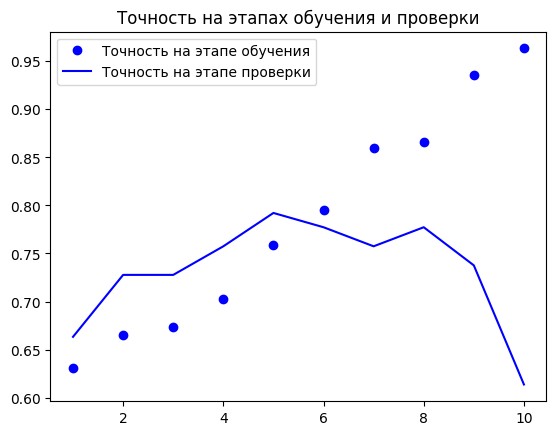

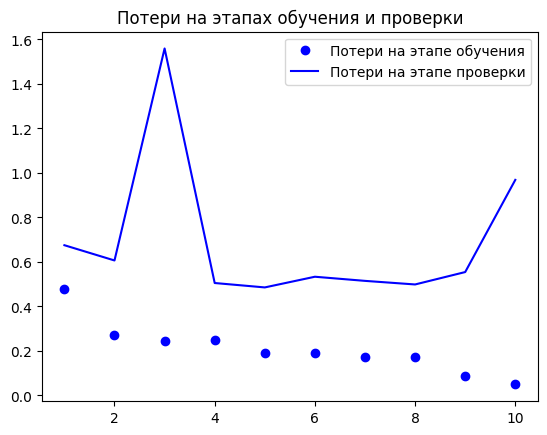

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label = 'Точность на этапе обучения')
plt.plot(epochs, val_accuracy, "b", label = 'Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = 'Потери на этапе обучения')
plt.plot(epochs, val_loss, "b", label = 'Потери на этапе проверки')
plt.title('Потери на этапах обучения и проверки')
plt.legend()
plt.show()

#### Модель дерьма достигает пика метрик на 3 эпохе

# Baseline + DataAugmentation (firts_epoch: val_loss = 0.57, best: val_loss = 0.45)

#### Инициализируем слои, которые отвечают за аугментацию данных

In [ ]:
data_aug = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

#### Инициализируем новую модель, добавляем еще один пулинговый и еще один сверточный слои

In [ ]:
inputs = keras.Input(shape = (256, 256, 3))
model = data_aug(inputs)
model = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu")(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu")(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu")(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu")(model)
model = layers.Flatten()(model)
model = layers.Dropout(0.5)(model)
outputs = layers.Dense(1, activation = "sigmoid")(model)
model_ = keras.Model(inputs = inputs, outputs = outputs)
model_.compile(
    loss = "binary_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "callback_2_simple_aug.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]
history = model_.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks,
    class_weight = class_weights
)

Epoch 1/30
26/26 [==============================] - 160s 6s/step - loss: 0.3443 - accuracy: 0.6198 - val_loss: 0.5797 - val_accuracy: 0.7277
Epoch 2/30
26/26 [==============================] - 157s 6s/step - loss: 0.2925 - accuracy: 0.6420 - val_loss: 0.5934 - val_accuracy: 0.7277
Epoch 3/30
26/26 [==============================] - 153s 6s/step - loss: 0.2868 - accuracy: 0.6420 - val_loss: 0.5461 - val_accuracy: 0.7277
Epoch 4/30
26/26 [==============================] - 175s 7s/step - loss: 0.2758 - accuracy: 0.6420 - val_loss: 0.5304 - val_accuracy: 0.7277
Epoch 5/30
26/26 [==============================] - 154s 6s/step - loss: 0.2724 - accuracy: 0.6420 - val_loss: 0.5452 - val_accuracy: 0.7277
Epoch 6/30
26/26 [==============================] - 155s 6s/step - loss: 0.2630 - accuracy: 0.6420 - val_loss: 0.5285 - val_accuracy: 0.7277
Epoch 7/30
26/26 [==============================] - 154s 6s/step - loss: 0.2656 - accuracy: 0.6420 - val_loss: 0.5025 - val_accuracy: 0.7277
Epoch 8/30
26

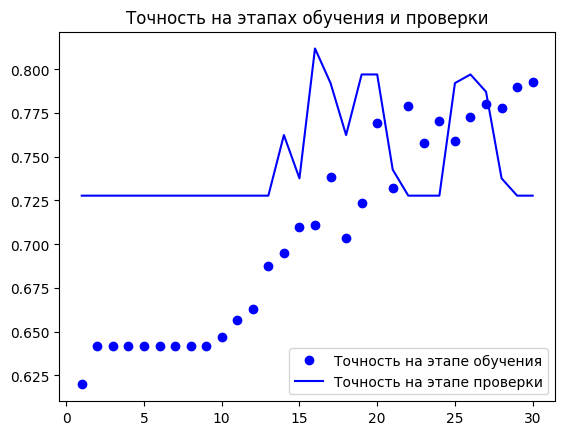

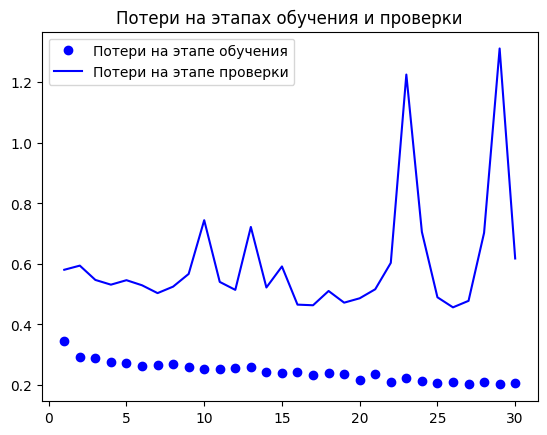

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label = "Точность на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label = "Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label = "Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

# Углубим DataAugmentation + обучим на большем количестве эпох (first epoch: val_loss = 0.6; best: val_loss = 0.55)

#### Модель

In [ ]:
data_aug = keras.Sequential(
    [
    layers.RandomCrop(height = 120, width = 120),
    layers.RandomFlip('horizontal'),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomFlip('vertical'),
    layers.RandomContrast(0.2)
    ]
)

In [ ]:
inputs = keras.Input(shape = (256, 256, 3))
x = data_aug(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_ = keras.Model(inputs = inputs, outputs = outputs)
model_.compile(
    loss = "binary_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

#### Обучение + колбеки

In [ ]:
class_weights = {0: 667/1012, 1: 345/1012}

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "deep_data_aug_new.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model_.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks,
    class_weight = class_weights
)

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label = "Точность на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label = "Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.figure()
plt.plot(epochs, loss, "bo", label = "Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label = "Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

# Добавим в модель падинг и проведем эксперименты с оптимизатором (val_loss = 0.5)

#### Модель

In [ ]:
data_aug = keras.Sequential(
    [
        layers.RandomCrop(height = 128, width = 128),
        layers.RandomFlip('horizontal'),
        layers.RandomFlip('vertical'),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.5)
    ]
)

In [ ]:
inputs = keras.Input(shape = (256, 256, 3))
model = data_aug(inputs)
model = layers.Rescaling(1./255)(model)
model = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same')(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same')(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu', padding = 'same')(model)
model = layers.Flatten()(model)
model = layers.Dropout(0.5)(model)
outputs = layers.Dense(1, activation = 'sigmoid')(model)
model_ = keras.Model(inputs = inputs, outputs = outputs)
model_.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

#### Обучение + колбеки

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'padding_same_adam.keras',
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model_.fit(
    image_train,
    target_train,
    epochs = 30,
    validation_data = (image_val, target_val),
    callbacks = callbacks
)

Epoch 1/30
26/26 [==============================] - 80s 3s/step - loss: 0.6863 - accuracy: 0.6057 - val_loss: 0.6517 - val_accuracy: 0.6601
Epoch 2/30
26/26 [==============================] - 76s 3s/step - loss: 0.6480 - accuracy: 0.6588 - val_loss: 0.6746 - val_accuracy: 0.6601
Epoch 3/30
26/26 [==============================] - 74s 3s/step - loss: 0.6564 - accuracy: 0.6588 - val_loss: 0.6462 - val_accuracy: 0.6601
Epoch 4/30
26/26 [==============================] - 59s 2s/step - loss: 0.6555 - accuracy: 0.6588 - val_loss: 0.6536 - val_accuracy: 0.6601
Epoch 5/30
26/26 [==============================] - 50s 2s/step - loss: 0.6494 - accuracy: 0.6588 - val_loss: 0.6421 - val_accuracy: 0.6601
Epoch 6/30
26/26 [==============================] - 47s 2s/step - loss: 0.6424 - accuracy: 0.6588 - val_loss: 0.6432 - val_accuracy: 0.6601
Epoch 7/30
26/26 [==============================] - 48s 2s/step - loss: 0.6389 - accuracy: 0.6588 - val_loss: 0.6185 - val_accuracy: 0.6601
Epoch 8/30
26/26 [==

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "go", label = "Точность модели на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label = "Точность модели на этапе валидации")
plt.title("Точносто модели во время обучения и проверки")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "go", label = "Потери модели на этапе обучения")
plt.plot(epochs, val_loss, "b", label = "Потери модели на этапе проверки")
plt.tite("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

# Еще одна архитектура

In [ ]:
class_weights = {0: 667/1012, 1: 345/1012}

In [ ]:
data_aug = keras.Sequential(
    [
    layers.RandomCrop(height = 120, width = 120),
    layers.RandomFlip('horizontal'),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomFlip('vertical'),
    layers.RandomContrast(0.2)
    ]
)

In [ ]:
inputs = keras.Input(shape = (512, 512, 3))
x = data_aug(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_ = keras.Model(inputs = inputs, outputs = outputs)
model_.compile(
    loss = "binary_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "deep_data_aug_new.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model_.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks,
    class_weight = class_weights
)

Epoch 1/30
26/26 [==============================] - 108s 4s/step - loss: 0.3198 - accuracy: 0.6210 - val_loss: 0.5890 - val_accuracy: 0.7277
Epoch 2/30
26/26 [==============================] - 75s 3s/step - loss: 0.2979 - accuracy: 0.6420 - val_loss: 0.5913 - val_accuracy: 0.7277
Epoch 3/30
26/26 [==============================] - 70s 3s/step - loss: 0.2936 - accuracy: 0.6420 - val_loss: 0.5863 - val_accuracy: 0.7277
Epoch 4/30
26/26 [==============================] - 76s 3s/step - loss: 0.2948 - accuracy: 0.6420 - val_loss: 0.5866 - val_accuracy: 0.7277
Epoch 5/30
26/26 [==============================] - 70s 3s/step - loss: 0.2924 - accuracy: 0.6420 - val_loss: 0.5965 - val_accuracy: 0.7277
Epoch 6/30
26/26 [==============================] - 74s 3s/step - loss: 0.2928 - accuracy: 0.6420 - val_loss: 0.6063 - val_accuracy: 0.7277
Epoch 7/30
26/26 [==============================] - 74s 3s/step - loss: 0.2933 - accuracy: 0.6420 - val_loss: 0.6113 - val_accuracy: 0.7277
Epoch 8/30
26/26 [=

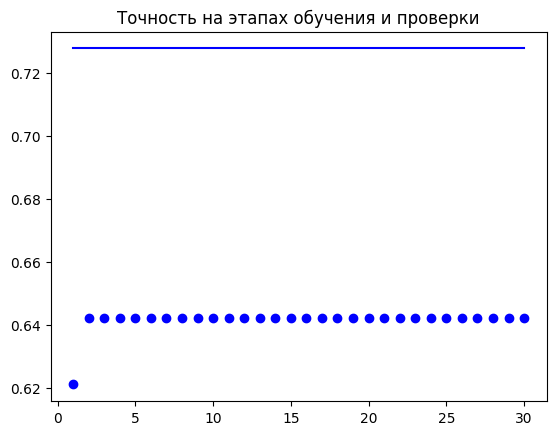

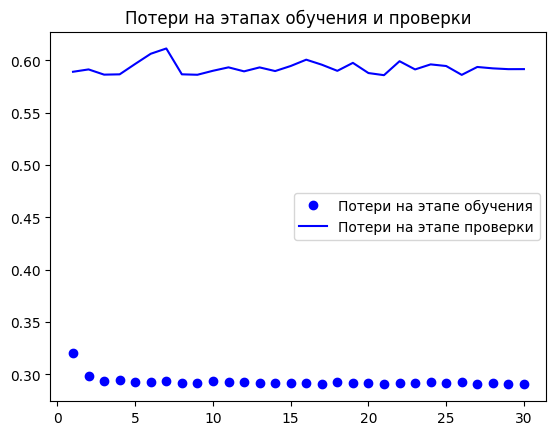

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label = "Точность на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label = "Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.figure()
plt.plot(epochs, loss, "bo", label = "Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label = "Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

# Тестирую подход (first_epoch: val_loss = 0.59, best: val_loss = )

In [ ]:
class_weights = {0 : 667/1012, 1: 305/1012}

#### Модель

In [ ]:
data_aug = keras.Sequential(
    [
        layers.RandomCrop(height = 120, width = 120),
        layers.RandomFlip('horizontal'),
        layers.RandomZoom(0.2),
        layers.RandomRotation(0.2),
        layers.RandomFlip('vertical'),
        layers.RandomContrast(0.2)
    ]
)

inputs = keras.Input(shape = (512, 512, 3))
model = data_aug(inputs)
model = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(model)
model = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(model)
model = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(model)
model = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(model)
model = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu')(model)
model = layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu')(model)
model = layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu')(model)
model = layers.MaxPooling2D(pool_size = 2)(model)
model = layers.Conv2D(filters = 512, kernel_size = 2, activation = 'relu')(model)
model = layers.Conv2D(filters = 512, kernel_size = 1, activation = 'relu')(model)
model = layers.Conv2D(filters = 512, kernel_size = 1, activation = 'relu')(model)
model = layers.Flatten()(model)
model = layers.Dropout(0.5)(model)
outputs = layers.Dense(1, activation = 'sigmoid')(model)

model_ = keras.Model(inputs = inputs, outputs = outputs)
model_.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = [tf.keras.metrics.Recall()]
)

#### callbacks + обучение

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "most_deep_adam_360_15epochs.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model_.fit(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
    callbacks = callbacks,
    class_weight = class_weights
)

Epoch 1/15
26/26 [==============================] - 280s 11s/step - loss: 0.3947 - recall: 0.0276 - val_loss: 0.5874 - val_recall: 0.0000e+00
Epoch 2/15
26/26 [==============================] - 269s 10s/step - loss: 0.2740 - recall: 0.0000e+00 - val_loss: 0.6010 - val_recall: 0.0000e+00
Epoch 3/15
26/26 [==============================] - 297s 11s/step - loss: 0.2694 - recall: 0.0000e+00 - val_loss: 0.5819 - val_recall: 0.0000e+00
Epoch 4/15
26/26 [==============================] - 266s 10s/step - loss: 0.2703 - recall: 0.0000e+00 - val_loss: 0.5871 - val_recall: 0.0000e+00
Epoch 5/15
26/26 [==============================] - 266s 10s/step - loss: 0.2863 - recall: 0.0000e+00 - val_loss: 0.5919 - val_recall: 0.0000e+00
Epoch 6/15
26/26 [==============================] - 334s 13s/step - loss: 0.2701 - recall: 0.0000e+00 - val_loss: 0.5902 - val_recall: 0.0000e+00
Epoch 7/15
26/26 [==============================] - 408s 16s/step - loss: 0.2708 - recall: 0.0000e+00 - val_loss: 0.6007 - val_r

#### Визуализация работы модели

In [ ]:
recall = history.history["recall"]
val_recall = history.history["val_recall"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(recall) + 1)
plt.plot(epochs, recall, "bo", label = "Recall модели на этапе обучения")
plt.plot(epochs, val_recall, "r", label = "Recall модели на этапе валидации")
plt.title("Recall модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Потери модели на этапе обучения")
plt.plot(epochs, val_loss, "r", label = "Потери модели на этапе валидации")
plt.title("Потери на этапах обучения и валидации")
plt.legend()
plt.show()

# Добавляю остаточные связи и пакетную нормализацию + тестирую раздельную свертку по глубине (best: val_loss = 0.03, recall = 0.89)

#### Модель

In [ ]:
class_weights = {0 : 667/1012, 1: 305/1012}

In [ ]:
data_aug = keras.Sequential(
    [
        layers.RandomCrop(height = 120, width = 120),
        layers.RandomFlip('horizontal'),
        layers.RandomZoom(0.2),
        layers.RandomRotation(0.2),
        layers.RandomFlip('vertical'),
        layers.RandomContrast(0.2)
    ]
)
inputs = keras.Input(shape = (256, 256, 3))
x = data_aug(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 5, use_bias = False)(x) # use_bias = False нужен по причине того, что мы хотим вызывать слой активации после пакетной нормализации, это важно из-за того как устроен relu
for size in [32, 64, 128, 256, 512, 1024, 2048]:
      residual = x #остаточные связи
      x = layers.BatchNormalization()(x, training = True) #пакетная нормализация
      x = layers.Activation("relu")(x)
      x = layers.SeparableConv2D(filters = size, kernel_size = 3, padding = 'same', use_bias = False)(x) #Слой раздельной свертки по глубине

      x = layers.BatchNormalization()(x, training = True)
      x = layers.Activation("relu")(x)
      x = layers.SeparableConv2D(filters = size, kernel_size = 3, padding = 'same', use_bias = False)(x)

      x = layers.MaxPooling2D(2, padding = 'same')(x)
      #Так делается остаточная свзяь если у нас есть слой MaxPooling2D
      residual = layers.Conv2D(filters = size, kernel_size = 1, strides = 2, padding = 'same', use_bias = False)(residual)
      x = layers.add([x, residual])
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision()]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "most_deep_adam_360_15epochs.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_generator,
    epochs = 300,
    validation_data = validation_generator,
    callbacks = callbacks,
    class_weight = class_weights
)

Epoch 1/300
26/26 [==============================] - 13s 496ms/step - loss: 0.2634 - recall: 0.0138 - accuracy: 0.0000e+00 - precision: 0.5714 - val_loss: 0.7902 - val_recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/300
26/26 [==============================] - 9s 358ms/step - loss: 0.2528 - recall: 0.0345 - accuracy: 0.0000e+00 - precision: 0.6250 - val_loss: 0.6598 - val_recall: 0.3455 - val_accuracy: 0.0000e+00 - val_precision: 0.3654
Epoch 3/300
26/26 [==============================] - 10s 395ms/step - loss: 0.2610 - recall: 0.1034 - accuracy: 0.0000e+00 - precision: 0.5556 - val_loss: 0.5640 - val_recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/300
26/26 [==============================] - 10s 388ms/step - loss: 0.2429 - recall: 0.0241 - accuracy: 0.0000e+00 - precision: 0.5833 - val_loss: 0.5750 - val_recall: 0.1091 - val_accuracy: 0.0000e+00 - val_precision: 0.7500
Epoch 5/300
26/26 [==============================

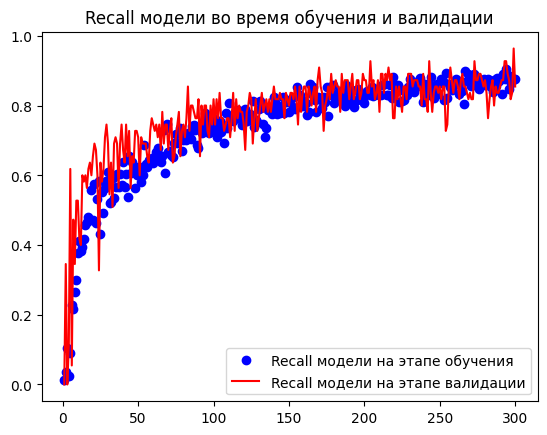

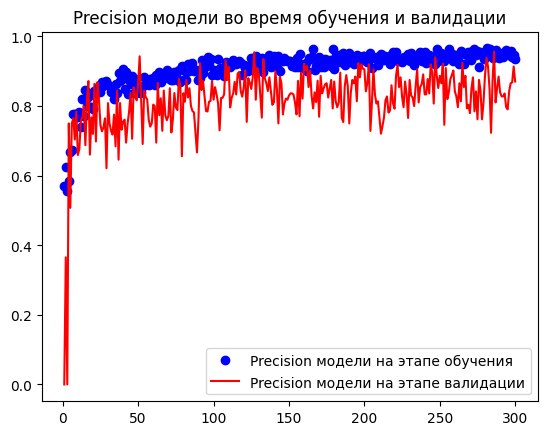

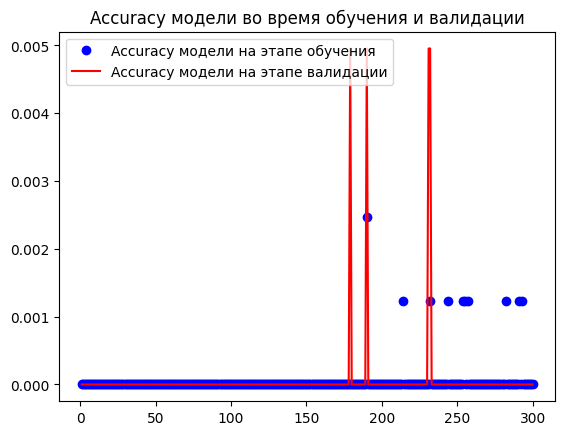

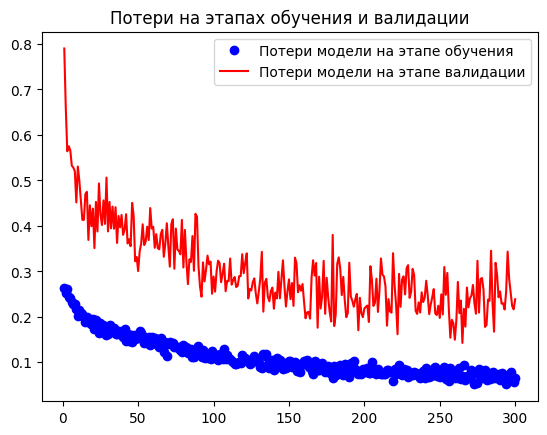

In [ ]:
recall = history.history["recall"]
val_recall = history.history["val_recall"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
precision = history.history["precision"]
val_precision = history.history["val_precision"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(recall) + 1)
plt.plot(epochs, recall, "bo", label = "Recall модели на этапе обучения")
plt.plot(epochs, val_recall, "r", label = "Recall модели на этапе валидации")
plt.title("Recall модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, precision, "bo", label = "Precision модели на этапе обучения")
plt.plot(epochs, val_precision, "r", label = "Precision модели на этапе валидации")
plt.title("Precision модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, accuracy, "bo", label = "Accuracy модели на этапе обучения")
plt.plot(epochs, val_accuracy, "r", label = "Accuracy модели на этапе валидации")
plt.title("Accuracy модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Потери модели на этапе обучения")
plt.plot(epochs, val_loss, "r", label = "Потери модели на этапе валидации")
plt.title("Потери на этапах обучения и валидации")
plt.legend()
plt.show()

# Добавляем предобученую модель (выделение признаков, без обогащения данных) (VGG16) (очень долго векторизует, нужно исправить)

In [ ]:
conv_base_vgg = keras.applications.vgg16.VGG16(
      weights = "imagenet",
      include_top = False,
      input_shape = (256, 256, 3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base_vgg.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_generator)
val_features, val_labels = get_features_and_labels(validation_generator)

### Мы повыделяли фичи с фоток, теперь добавим полносвязный классификатор

In [ ]:
inputs = keras.Input(shape = (8, 8, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation = "relu")
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision()]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "vgg_first_try_50epochs.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_features, train_labels,
    epochs = 50,
    validation_data = (val_features, val_labels),
    callbacks = callbacks,
    class_weight = class_weights
)

In [ ]:
recall = history.history["recall"]
val_recall = history.history["val_recall"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
precision = history.history["precision"]
val_precision = history.history["val_precision"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(recall) + 1)
plt.plot(epochs, recall, "bo", label = "Recall модели на этапе обучения")
plt.plot(epochs, val_recall, "r", label = "Recall модели на этапе валидации")
plt.title("Recall модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, precision, "bo", label = "Precision модели на этапе обучения")
plt.plot(epochs, val_precision, "r", label = "Precision модели на этапе валидации")
plt.title("Precision модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, accuracy, "bo", label = "Accuracy модели на этапе обучения")
plt.plot(epochs, val_accuracy, "r", label = "Accuracy модели на этапе валидации")
plt.title("Accuracy модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Потери модели на этапе обучения")
plt.plot(epochs, val_loss, "r", label = "Потери модели на этапе валидации")
plt.title("Потери на этапах обучения и валидации")
plt.legend()
plt.show()

# Подбор гиперпараметров для лучшей модели, полученной ранее

In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [ ]:
!pip install scikeras

In [ ]:
pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def build_model(hp):
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])
    data_aug = keras.Sequential(
        [
            layers.RandomCrop(height=120, width=120),
            layers.RandomFlip('horizontal'),
            layers.RandomZoom(0.2),
            layers.RandomRotation(0.2),
            layers.RandomFlip('vertical'),
            layers.RandomContrast(0.2)
        ]
    )

    model = Sequential([
        data_aug,
        layers.Rescaling(1./255),
        layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=64, step=32),
            kernel_size=hp.Int('conv_1_kernel', min_value=3, max_value=3, step=1),
            activation=activation_choice
        ),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=64, max_value=128, step=32),
            kernel_size=hp.Int('conv_2_kernel', min_value=3, max_value=3, step=1),
            activation=activation_choice
        ),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(
            filters=hp.Int('conv_3_filter', min_value=128, max_value=256, step=32),
            kernel_size=hp.Int('conv_3_kernel', min_value=3, max_value=3, step=1),
            activation=activation_choice
        ),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(
            filters=hp.Int('conv_4_filter', min_value=256, max_value=512, step=32),
            kernel_size=hp.Int('conv_4_kernel', min_value=3, max_value=3, step=1),
            activation=activation_choice
        ),
        layers.MaxPooling2D(pool_size=2),
        layers.Flatten(),
        layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.get(hp.Choice('optimizer', ['adam', 'rmsprop', 'SGD'])),
        metrics=['accuracy']
    )

    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='sample_data',
    project_name='tune_data_aug_last'
)

tuner.search(train_generator)


# resnet

In [ ]:
for i in range(df_train.shape[0]):
    df_train['id'][i] = '/content/sample_data/images/' + df_train['id'][i]
for i in range(df_test.shape[0]):
    df_test['id'][i] = '/content/sample_data/images/' + df_test['id'][i]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_aug = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],  # Adjust brightness instead of contrast
    rotation_range=20,
    fill_mode='nearest'
)


In [ ]:
import cv2
# Предварительная обработка и загрузка изображений
images = []
labels = []

for idx, row in df_train.iterrows():
    # Загрузка изображения
    image = cv2.imread(row['id'])

    # Пример предварительной обработки: изменение размера изображения до 224x224 пикселей
    image = cv2.resize(image, (256, 256))

    # Пример преобразования метки класса (в этом примере она уже может быть в нужном формате)
    label = row['target']

    # Добавление изображения и метки класса в списки
    images.append(image)
    labels.append(label)

# Преобразование списков в numpy массивы для подачи в модель
images = np.array(images)
labels = np.array(labels)
print(images[0].shape)

(256, 256, 3)


In [ ]:
aug_images = []
aug_targets = []

for image, label in zip(images, labels):
    image = image.reshape((1,) + image.shape)
    augmentation_iterator = data_aug.flow(image, batch_size = 1)
    for i in range(4):
        augmentation_image = next(augmentation_iterator)[0]
        aug_images.append(augmentation_image)
        aug_targets.append(label)
aug_images = np.array(aug_images)
aug_targets = np.array(aug_targets)

print(aug_images.shape)
print(aug_targets.shape)

(4048, 256, 256, 3)
(4048,)


In [ ]:
images = np.concatenate((images, aug_images), axis=0)
labels = np.concatenate((labels, aug_targets), axis=0)
print(images.shape)
print(labels.shape)
print(labels.dtype)

(5060, 256, 256, 3)
(5060,)
<U1


In [ ]:
print(images.shape)

(5060, 256, 256, 3)


In [ ]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (256, 256, 3),
)
ResNet_base_model.trainable = True
for layer in ResNet_base_model.layers[:-9]:
  layer.trainable = False

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (256, 256, 3))
#x = keras.applications.ResNet50.preprocess_input(x)
x = ResNet_base_model(inputs)
#x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = layers.Flatten()(x)
#x = Dense(256, activation = "relu")(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(rate = .5)(x)
x = Dense(256, activation = "relu")(x)
x = Dropout(rate = .5)(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.00001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
print("Starting training with Transfer Learning using ResNet50...")

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "resnet_30_adam_2dense_medium_dropout.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

ResNet_model_history = ResNet_model.fit(
    images, labels,
    batch_size = 32,
    epochs = 30,
    validation_split = 0.2,
    verbose = 1,
    callbacks = callbacks
)
print("Transfer Learning training finished.")


Starting training with Transfer Learning using ResNet50...


In [ ]:
recall = ResNet_model_history.history["recall"]
val_recall = ResNet_model_history.history["val_recall"]
accuracy = ResNet_model_history.history["accuracy"]
val_accuracy = ResNet_model_history.history["val_accuracy"]
precision = ResNet_model_history.history["precision"]
val_precision = ResNet_model_history.history["val_precision"]
loss = ResNet_model_history.history["loss"]
val_loss = ResNet_model_history.history["val_loss"]
epochs = range(1, len(recall) + 1)
plt.plot(epochs, recall, "bo", label = "Recall модели на этапе обучения")
plt.plot(epochs, val_recall, "r", label = "Recall модели на этапе валидации")
plt.title("Recall модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, precision, "bo", label = "Precision модели на этапе обучения")
plt.plot(epochs, val_precision, "r", label = "Precision модели на этапе валидации")
plt.title("Precision модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, accuracy, "bo", label = "Accuracy модели на этапе обучения")
plt.plot(epochs, val_accuracy, "r", label = "Accuracy модели на этапе валидации")
plt.title("Accuracy модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Потери модели на этапе обучения")
plt.plot(epochs, val_loss, "r", label = "Потери модели на этапе валидации")
plt.title("Потери на этапах обучения и валидации")
plt.legend()
plt.show()

In [ ]:
import cv2
# Предварительная обработка и загрузка изображений
images_test = []

for idx, row in df_test.iterrows():
    # Загрузка изображения

    try:
        image = cv2.imread(row['id'])
        # Process the image here if needed
    except Exception as e:
        print(f"Error reading file: {row['id']}. Error message: {e}")

    # Пример предварительной обработки: изменение размера изображения до 224x224 пикселей
    image = cv2.resize(image, (256, 256))

    # Добавление изображения и метки класса в списки
    images_test.append(image)

# Преобразование списков в numpy массивы для подачи в модель
images_test = np.array(images_test)

In [ ]:
images_test.shape

(506, 256, 256, 3)

In [ ]:
df_test = pd.read_csv('/content/sample_data/test.csv')
df_test['target'] = test_res

In [ ]:
df_test.to_csv('resnet_freeze7_150_adam000001_dropout06.csv', index = False)

# DenseNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

DenseNet_base_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3),
)
Xception_base_model.trainable = True
for layer in Xception_base_model.layers[:-10]:
    layer.trainable = False

inputs = tf.keras.Input(shape=(256, 256, 3))
x = DenseNet_base_model(inputs)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(rate=.65)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(rate=.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
DenseNet= tf.keras.Model(inputs, outputs)

In [ ]:
print("Starting training with Transfer Learning using ResNet50...")

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "DenseNet_30_adam_2dense_medium_dropout.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

DenseNet_model_history = DenseNet_model.fit(
    images, labels,
    batch_size = 32,
    epochs = 30,
    validation_split = 0.2,
    verbose = 1,
    callbacks = callbacks
)
print("Transfer Learning training finished.")


In [ ]:
recall = DenseNet_model_history.history["recall"]
val_recall = DenseNet_model_history.history["val_recall"]
accuracy = DenseNet_model_history.history["accuracy"]
val_accuracy = DenseNet_model_history.history["val_accuracy"]
precision = DenseNet_model_history.history["precision"]
val_precision = DenseNet_model_history.history["val_precision"]
loss = DenseNet_model_history.history["loss"]
val_loss = DenseNet_model_history.history["val_loss"]
epochs = range(1, len(recall) + 1)
plt.plot(epochs, recall, "bo", label = "Recall модели на этапе обучения")
plt.plot(epochs, val_recall, "r", label = "Recall модели на этапе валидации")
plt.title("Recall модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, precision, "bo", label = "Precision модели на этапе обучения")
plt.plot(epochs, val_precision, "r", label = "Precision модели на этапе валидации")
plt.title("Precision модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, accuracy, "bo", label = "Accuracy модели на этапе обучения")
plt.plot(epochs, val_accuracy, "r", label = "Accuracy модели на этапе валидации")
plt.title("Accuracy модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Потери модели на этапе обучения")
plt.plot(epochs, val_loss, "r", label = "Потери модели на этапе валидации")
plt.title("Потери на этапах обучения и валидации")
plt.legend()
plt.show()

In [ ]:
import cv2
# Предварительная обработка и загрузка изображений
images_test = []

for idx, row in df_test.iterrows():
    # Загрузка изображения

    try:
        image = cv2.imread(row['id'])
        # Process the image here if needed
    except Exception as e:
        print(f"Error reading file: {row['id']}. Error message: {e}")

    # Пример предварительной обработки: изменение размера изображения до 224x224 пикселей
    image = cv2.resize(image, (256, 256))

    # Добавление изображения и метки класса в списки
    images_test.append(image)

# Преобразование списков в numpy массивы для подачи в модель
images_test = np.array(images_test)

In [ ]:
test_res = DenseNet_model.predict(images_test)

In [ ]:
df_test = pd.read_csv('test.csv')
df_test['target'] = test_res

In [ ]:
df_test.to_csv('DenseNet_freeze10_30_adam000001_dropout_medium.csv', index = False)

# Xception

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Building the Transfer Learning model using Xception
Xception_base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3),
)
Xception_base_model.trainable = True
for layer in Xception_base_model.layers[:-10]:
    layer.trainable = False

inputs = tf.keras.Input(shape=(256, 256, 3))
x = Xception_base_model(inputs)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(rate=.65)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(rate=.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
Xception_model = tf.keras.Model(inputs, outputs)

Xception_model.compile(
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.00001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [ ]:
print("Starting training with Transfer Learning using ResNet50...")

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "Xception_30_adam_2dense_medium_dropout.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

Xception_model_history = Xception_model.fit(
    images, labels,
    batch_size = 32,
    epochs = 30,
    validation_split = 0.2,
    verbose = 1,
    callbacks = callbacks
)
print("Transfer Learning training finished.")

In [ ]:
recall = Xception_model_history.history["recall"]
val_recall = Xception_model_history.history["val_recall"]
accuracy = Xception_model_history.history["accuracy"]
val_accuracy = Xception_model_history.history["val_accuracy"]
precision = Xception_model_history.history["precision"]
val_precision = Xception_model_history.history["val_precision"]
loss = Xception_model_history.history["loss"]
val_loss = ResNet_model_history.history["val_loss"]
epochs = range(1, len(recall) + 1)
plt.plot(epochs, recall, "bo", label = "Recall модели на этапе обучения")
plt.plot(epochs, val_recall, "r", label = "Recall модели на этапе валидации")
plt.title("Recall модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, precision, "bo", label = "Precision модели на этапе обучения")
plt.plot(epochs, val_precision, "r", label = "Precision модели на этапе валидации")
plt.title("Precision модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, accuracy, "bo", label = "Accuracy модели на этапе обучения")
plt.plot(epochs, val_accuracy, "r", label = "Accuracy модели на этапе валидации")
plt.title("Accuracy модели во время обучения и валидации")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Потери модели на этапе обучения")
plt.plot(epochs, val_loss, "r", label = "Потери модели на этапе валидации")
plt.title("Потери на этапах обучения и валидации")
plt.legend()
plt.show()